# YOLOv8 Nesne Tanıma

## Ortam Hazırlığı

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/YOLOv8/1_object_detection

/content/drive/MyDrive/YOLOv8/1_object_detection


In [4]:
# Ultralytics'i indir.
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.183 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


## Test / Prediction

In [5]:
!yolo detect predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.23M/6.23M [00:00<00:00, 64.1MB/s]
Ultralytics YOLOv8.0.183 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 476k/476k [00:00<00:00, 11.1MB/s]
image 1/1 /content/drive/MyDrive/YOLOv8/1_object_detection/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 366.4ms
Speed: 22.3ms preprocess, 366.4ms inference, 35.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


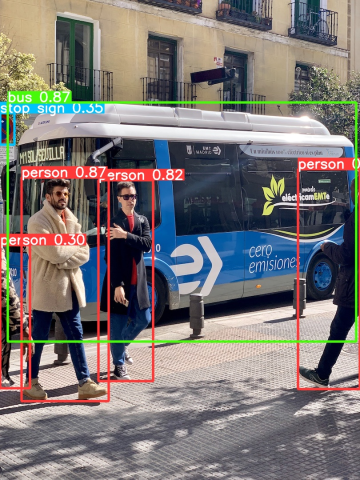

In [10]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img = cv2.imread("runs/detect/predict/bus.jpg")
img = imutils.resize(img, width=360)
cv2_imshow(img)


0: 640x480 4 persons, 1 bus, 1 stop sign, 327.2ms
Speed: 9.7ms preprocess, 327.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


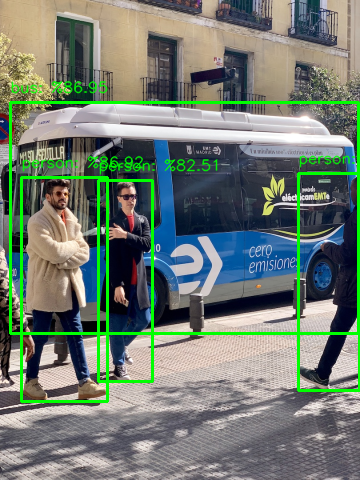

In [17]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "bus.jpg"
model_path = "yolov8n.pt"

model = YOLO(model_path)

img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

results = model(img)[0]
# print(results)

threshold = 0.5
for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  # print(result)
  if score > threshold:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)

    class_name = results.names[class_id]
    score = score * 100
    text = f"{class_name}: %{score:.2f}"

    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0,255,0), 1, cv2.LINE_AA)

cv2_imshow(img)

##  Training

In [5]:
!unzip data/brain_tumor_dataset.zip -d ./data

Archive:  data/brain_tumor_dataset.zip
   creating: ./data/brain_tumor_dataset/images/
   creating: ./data/brain_tumor_dataset/images/test/
  inflating: ./data/brain_tumor_dataset/images/test/110.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/116.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/118.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/121.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/128.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/133.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/16.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/171.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/178.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/184.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/185.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/187.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/198.jpg  
  inflating: ./data/brain_tumor_dataset/images/test/20.

In [6]:
!yolo detect train data=data/config.yaml model=yolov8n.pt epochs=25 imgsz=640 workers=8 batch=8 device=0 name=yolov8_brain_tumor_detection

Ultralytics YOLOv8.0.183 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/config.yaml, epochs=25, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_brain_tumor_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

In [7]:
# Yarıda kalmış/kesilmiş eğitimi devam ettirme
!yolo detect train model=runs/detect/yolov8_brain_tumor_detection/weights/last.pt resume=True

Ultralytics YOLOv8.0.183 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/yolov8_brain_tumor_detection/weights/last.pt, data=data/config.yaml, epochs=25, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_brain_tumor_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=F

## Tümör Tespiti / Prediction

In [8]:
!yolo detect predict model=runs/detect/yolov8_brain_tumor_detection/weights/best.pt source=inference save=True

Ultralytics YOLOv8.0.183 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/82 /content/drive/MyDrive/YOLOv8/1_object_detection/inference/110.jpg: 640x640 1 Tumor, 8.1ms
image 2/82 /content/drive/MyDrive/YOLOv8/1_object_detection/inference/116.jpg: 640x640 1 Tumor, 7.4ms
image 3/82 /content/drive/MyDrive/YOLOv8/1_object_detection/inference/118.jpg: 640x640 1 Tumor, 7.4ms
image 4/82 /content/drive/MyDrive/YOLOv8/1_object_detection/inference/121.jpg: 640x640 1 Tumor, 9.6ms
image 5/82 /content/drive/MyDrive/YOLOv8/1_object_detection/inference/128.jpg: 640x640 1 Tumor, 7.3ms
image 6/82 /content/drive/MyDrive/YOLOv8/1_object_detection/inference/133.jpg: 640x640 2 Tumors, 7.4ms
image 7/82 /content/drive/MyDrive/YOLOv8/1_object_detection/inference/16.jpg: 640x640 1 Tumor, 7.4ms
image 8/82 /content/drive/MyDrive/YOLOv8/1_object_detection/inference/171.jpg: 640x640 2 Tumors, 7.8ms
image 9/82 /content/drive/M


0: 640x640 1 Tumor, 7.7ms
Speed: 3.2ms preprocess, 7.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


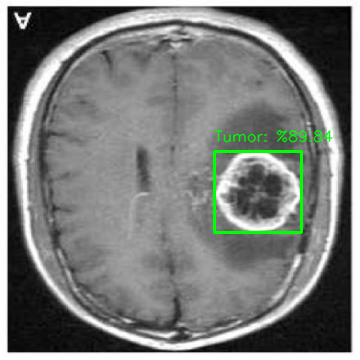

In [11]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_SIMPLEX

img_path = "inference/116.jpg"
model_path = "runs/detect/yolov8_brain_tumor_detection/weights/best.pt"

model = YOLO(model_path)

img = cv2.imread(img_path)
img = imutils.resize(img, width=360)

results = model(img)[0]
# print(results)

threshold = 0.5
for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result
  x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)
  # print(result)
  if score > threshold:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)

    class_name = results.names[class_id]
    score = score * 100
    text = f"{class_name}: %{score:.2f}"

    cv2.putText(img, text, (x1, y1-10), font, 0.5, (0,255,0), 1, cv2.LINE_AA)

cv2_imshow(img)

# ödev: inference içindeki tüm resimleri tara (glob, os) ve çıktıları bastır